# GAUSSIANA SIMPLES

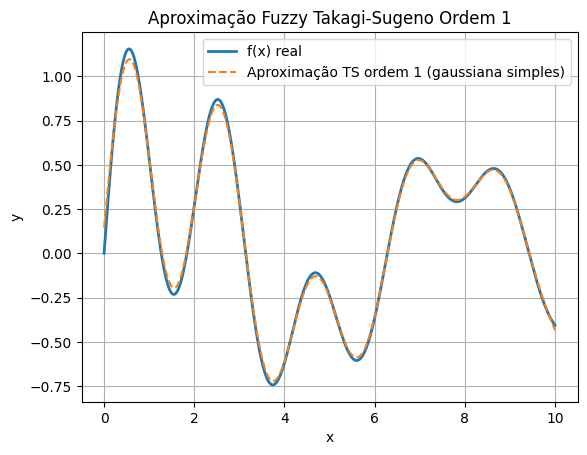

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Dados
x_values_gauss = np.linspace(0, 10, 1001)
f_values_gauss = [math.exp(-x/5) * math.sin(3*x) + 0.5 * math.sin(x) for x in x_values_gauss]

# Função de pertinência gaussiana simples
def gaussiana(x, c, sigma):
    return math.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# Definição dos centros das regras (20 regras)
num_regras = 35
centros = np.linspace(0, 10, num_regras)
sigma = 0.2  # largura da gaussiana

# Cálculo dos parâmetros a_i e b_i para cada regra usando regressão linear local
regras = []
for c in centros:
    pesos = np.array([gaussiana(x, c, sigma) for x in x_values_gauss])
    X = np.vstack([x_values_gauss, np.ones_like(x_values_gauss)]).T
    W = np.diag(pesos)
    Y = np.array(f_values_gauss)

    # Resolvendo (X^T W X) θ = X^T W Y para θ = [a_i, b_i]
    try:
        theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Y)
        a_i, b_i = theta
    except np.linalg.LinAlgError:
        a_i, b_i = 0, 0  # fallback caso a matriz seja singular

    regras.append({'c': c, 'a': a_i, 'b': b_i})

# Sistema TS1
def ts_order1(x):
    numerador = 0
    denominador = 0
    for r in regras:
        mu = gaussiana(x, r['c'], sigma)
        y_local = r['a'] * x + r['b']
        numerador += mu * y_local
        denominador += mu
    return numerador / max(denominador, 1e-6)

# Aproximação
approx_values_gauss_ts1 = [ts_order1(x) for x in x_values_gauss]

# Plotagem
plt.plot(x_values_gauss, f_values_gauss, label='f(x) real', linewidth=2)
plt.plot(x_values_gauss, approx_values_gauss_ts1, label='Aproximação TS ordem 1 (gaussiana simples)', linestyle='--')
plt.title("Aproximação Fuzzy Takagi-Sugeno Ordem 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
# Erro quadrático médio (MSE)
mse = sum((fr - fa) ** 2 for fr, fa in zip(f_values_gauss, approx_values_gauss_ts1)) / len(f_values_gauss)
print(f"Erro quadrático médio (MSE): {mse:.6f}")

Erro quadrático médio (MSE): 0.000499


In [3]:
import math
rmse = math.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.6f}")

Raiz do Erro Quadrático Médio (RMSE): 0.022349


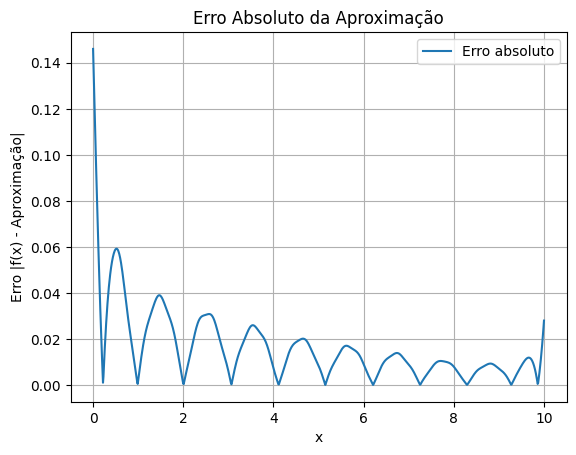

In [4]:
plt.plot(x_values_gauss, [abs(fr - fa) for fr, fa in zip(f_values_gauss, approx_values_gauss_ts1)], label="Erro absoluto")
plt.title("Erro Absoluto da Aproximação")
plt.xlabel("x")
plt.ylabel("Erro |f(x) - Aproximação|")
plt.grid(True)
plt.legend()
plt.show()

# GAUSSIANA DUPLA

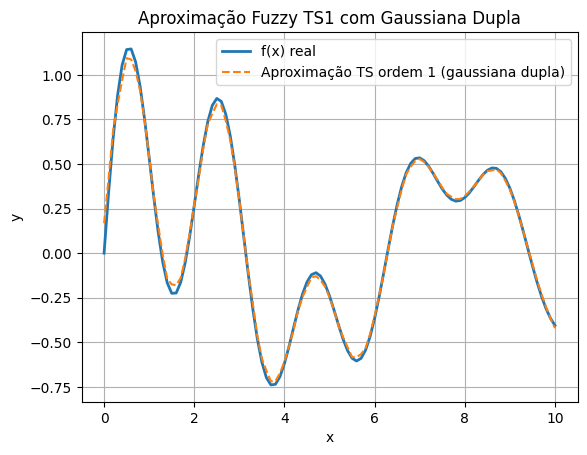

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Dados da função original
x_values_gaus_dupla = np.linspace(0, 10, 101)
f_values_gauss_dupla = [math.exp(-x/5) * math.sin(3*x) + 0.5 * math.sin(x) for x in x_values_gaus_dupla]

# Função de pertinência gaussiana dupla
def gauss_dupla(x, c1, sigma1, c2, sigma2):
    return math.exp(-((x - c1) ** 2) / (2 * sigma1 ** 2)) + math.exp(-((x - c2) ** 2) / (2 * sigma2 ** 2))

# Parâmetros dos centros das regras
num_regras = 35
centros = np.linspace(0, 10, num_regras)
sigma1 = 0.1
sigma2 = 0.2

# Criar parâmetros das gaussianas duplas (c1 = centro, c2 = centro + deslocamento)
deslocamento = 0.3
gaussianas_duplas = [{'c1': c, 'sigma1': sigma1, 'c2': c + deslocamento, 'sigma2': sigma2} for c in centros]

# Cálculo dos coeficientes a_i e b_i por regressão linear ponderada
regras = []
for g in gaussianas_duplas:
    pesos = np.array([gauss_dupla(x, g['c1'], g['sigma1'], g['c2'], g['sigma2']) for x in x_values_gaus_dupla])
    X = np.vstack([x_values_gaus_dupla, np.ones_like(x_values_gaus_dupla)]).T
    W = np.diag(pesos)
    Y = np.array(f_values_gauss_dupla)

    try:
        theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Y)
        a_i, b_i = theta
    except np.linalg.LinAlgError:
        a_i, b_i = 0, 0  # fallback em caso de singularidade

    regras.append({'c1': g['c1'], 'c2': g['c2'], 'a': a_i, 'b': b_i})

# Função aproximadora TS1 com gaussianas duplas
def ts1_gauss_dupla(x):
    numerador = 0
    denominador = 0
    for r in regras:
        mu = gauss_dupla(x, r['c1'], sigma1, r['c2'], sigma2)
        y_local = r['a'] * x + r['b']
        numerador += mu * y_local
        denominador += mu
    return numerador / max(denominador, 1e-6)

# Avaliação
approx_values_gaus_dupla_ts1_dupla = [ts1_gauss_dupla(x) for x in x_values_gaus_dupla]

# Plotagem
plt.plot(x_values_gaus_dupla, f_values_gauss_dupla, label='f(x) real', linewidth=2)
plt.plot(x_values_gaus_dupla, approx_values_gaus_dupla_ts1_dupla, label='Aproximação TS ordem 1 (gaussiana dupla)', linestyle='--')
plt.title("Aproximação Fuzzy TS1 com Gaussiana Dupla")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
mse = sum((fr - fa) ** 2 for fr, fa in zip(f_values_gauss_dupla, approx_values_gaus_dupla_ts1_dupla)) / len(f_values_gauss_dupla)
print(f"Erro quadrático médio (MSE): {mse:.6f}")

Erro quadrático médio (MSE): 0.000834


In [7]:
import math
rmse = math.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.6f}")

Raiz do Erro Quadrático Médio (RMSE): 0.028875


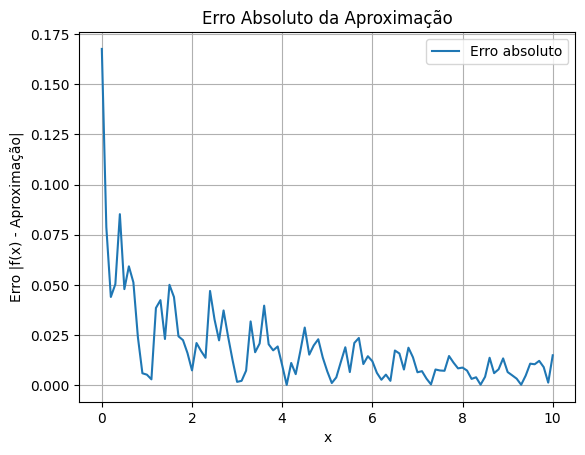

In [8]:
plt.plot(x_values_gaus_dupla, [abs(fr - fa) for fr, fa in zip(f_values_gauss_dupla, approx_values_gaus_dupla_ts1_dupla)], label="Erro absoluto")
plt.title("Erro Absoluto da Aproximação")
plt.xlabel("x")
plt.ylabel("Erro |f(x) - Aproximação|")
plt.grid(True)
plt.legend()
plt.show()

# TRIANGULAR

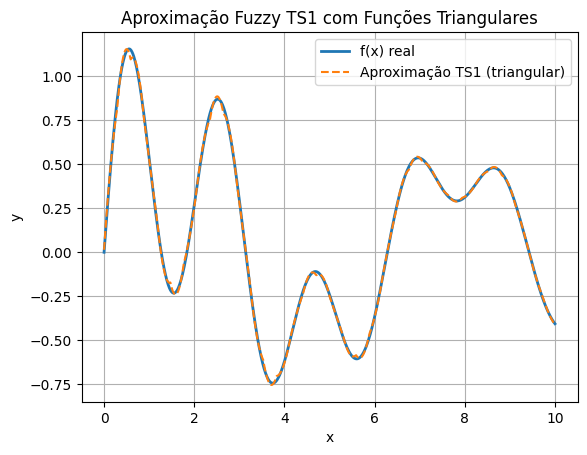

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Função original
x_values_triangular = np.linspace(0, 10, 1001)
f_values_triangular = [math.exp(-x/5) * math.sin(3*x) + 0.5 * math.sin(x) for x in x_values_triangular]

# Função de pertinência triangular
def triangular(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif x == b:
        return 1
    elif x < b:
        return (x - a) / (b - a)
    else:
        return (c - x) / (c - b)

# Definindo as regras com funções triangulares (simétricas e sobrepostas)
num_regras = 35
centros = np.linspace(0, 10, num_regras)
largura = (centros[1] - centros[0]) * 2  # sobreposição

triangulos = [{'a': c - largura/2, 'b': c, 'c': c + largura/2} for c in centros]

# Ajuste dos parâmetros a_i e b_i por regressão linear ponderada
regras = []
for t in triangulos:
    pesos = np.array([triangular(x, t['a'], t['b'], t['c']) for x in x_values_triangular])
    X = np.vstack([x_values_triangular, np.ones_like(x_values_triangular)]).T
    W = np.diag(pesos)
    Y = np.array(f_values_triangular)

    try:
        theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Y)
        a_i, b_i = theta
    except np.linalg.LinAlgError:
        a_i, b_i = 0, 0

    regras.append({'a': t['a'], 'b': t['b'], 'c': t['c'], 'a_i': a_i, 'b_i': b_i})

# Função aproximadora TS1 com triangulares
def ts1_triangular(x):
    numerador = 0
    denominador = 0
    for r in regras:
        mu = triangular(x, r['a'], r['b'], r['c'])
        y_local = r['a_i'] * x + r['b_i']
        numerador += mu * y_local
        denominador += mu
    return numerador / max(denominador, 1e-6)

# Aproximação final
approx_values_triangular_triangular = [ts1_triangular(x) for x in x_values_triangular]

# Plot
plt.plot(x_values_triangular, f_values_triangular, label='f(x) real', linewidth=2)
plt.plot(x_values_triangular, approx_values_triangular_triangular, label='Aproximação TS1 (triangular)', linestyle='--')
plt.title("Aproximação Fuzzy TS1 com Funções Triangulares")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


In [10]:
mse = sum((fr - fa) ** 2 for fr, fa in zip(f_values_triangular, approx_values_triangular_triangular)) / len(f_values_triangular)
print(f"Erro quadrático médio (MSE): {mse:.6f}")

Erro quadrático médio (MSE): 0.000126


In [11]:
import math
rmse = math.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.6f}")

Raiz do Erro Quadrático Médio (RMSE): 0.011236


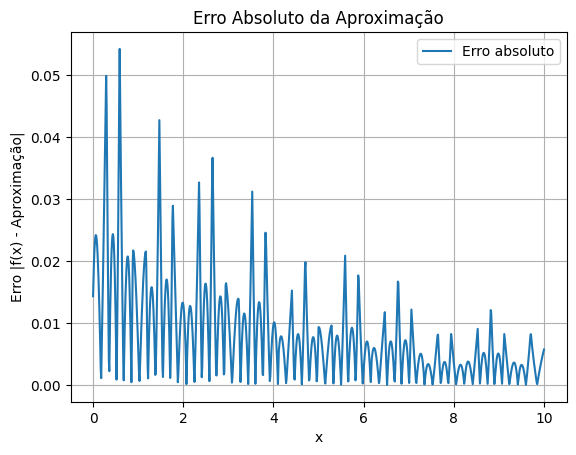

In [12]:
plt.plot(x_values_triangular, [abs(fr - fa) for fr, fa in zip(f_values_triangular, approx_values_triangular_triangular)], label="Erro absoluto")
plt.title("Erro Absoluto da Aproximação")
plt.xlabel("x")
plt.ylabel("Erro |f(x) - Aproximação|")
plt.grid(True)
plt.legend()
plt.show()

# COMPARAÇÃO GRÁFICA ENTRE TRIANGULAR - GAUSSIANA - GAUSSIANA DUPLA

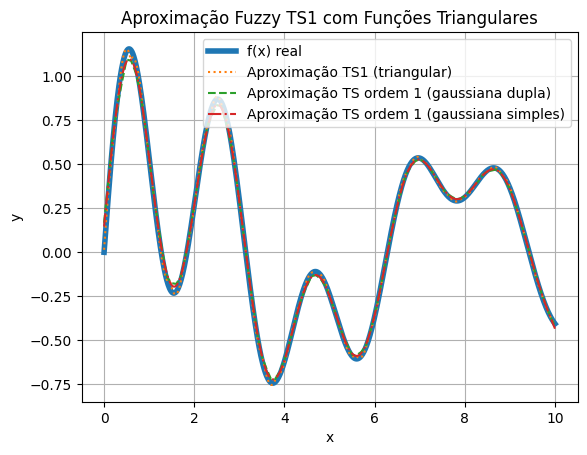

In [13]:
plt.plot(x_values_gauss, f_values_gauss, label='f(x) real', linewidth=4)
plt.plot(x_values_triangular, approx_values_triangular_triangular, label='Aproximação TS1 (triangular)', linestyle=':')
plt.plot(x_values_gaus_dupla, approx_values_gaus_dupla_ts1_dupla, label='Aproximação TS ordem 1 (gaussiana dupla)', linestyle='--')
plt.plot(x_values_gauss, approx_values_gauss_ts1, label='Aproximação TS ordem 1 (gaussiana simples)', linestyle='-.')
plt.title("Aproximação Fuzzy TS1 com Funções Triangulares")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

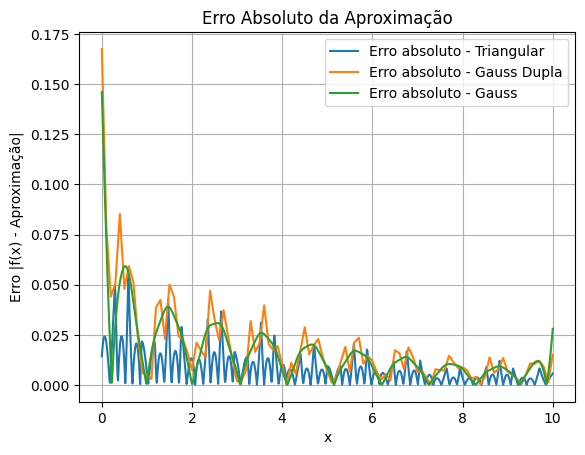

In [14]:
plt.plot(x_values_triangular, [abs(fr - fa) for fr, fa in zip(f_values_triangular, approx_values_triangular_triangular)], label="Erro absoluto - Triangular")
plt.plot(x_values_gaus_dupla, [abs(fr - fa) for fr, fa in zip(f_values_gauss_dupla, approx_values_gaus_dupla_ts1_dupla)], label="Erro absoluto - Gauss Dupla")
plt.plot(x_values_gauss, [abs(fr - fa) for fr, fa in zip(f_values_gauss, approx_values_gauss_ts1)], label="Erro absoluto - Gauss")
plt.title("Erro Absoluto da Aproximação")
plt.xlabel("x")
plt.ylabel("Erro |f(x) - Aproximação|")
plt.grid(True)
plt.legend()
plt.show()